In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import pylab
import sklearn.mixture as mixture
import pyclustertend
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("data2.csv")

In [3]:
#INICIA EL CLUSTERING

Lets = df[[ 'acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo',  'valence',]] #Declaramos nuestra lista de columnas a trabajar

CantDatos = np.array(Lets.sample(frac=0.1, random_state=123).reset_index(drop=True)) #Declaramos CantDatos
CantDatos_scaled = sklearn.preprocessing.scale(CantDatos) #Realizamos las modificaicones a CantDatos
pyclustertend.hopkins(CantDatos, len(CantDatos)) #Aplicamos HOPKINS para ver  la tendencia para los clusters

0.16628231798039692



El valor de hopkins nos da un 0.16628231798039692 alejado de 0.5 validando nuestro clustering.


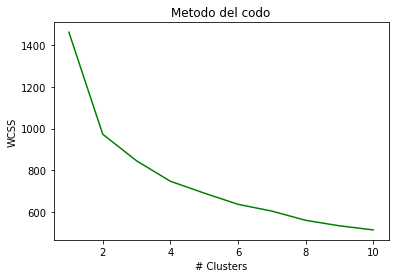

In [4]:
Lets_norm = (Lets - Lets.min()) / (Lets.max() - Lets.min())  #Realizamos una normalizacaion entre las variables a trabajar.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300)         #Utilizamos el metodo del codo y el algoritmo KMEANS
    kmeans.fit(Lets_norm)                                 #para determinar la mejor cantidad de clusters dependiendo los datos normalizados.
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,color='green')
plt.title('Metodo del codo')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')
plt.show()

In [2]:
df.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


Se normaliza lla data por medio del algoritmo min max con las columnas a utilizar, para hacer un fit

In [30]:
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo',  'valence',]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(df[feature_cols])

print(normalized_df[:2])

[[0.01024843 0.82482599 0.19073524 0.4263629  0.02243852 0.18181818
  0.15386234 0.74114059 1.         0.51444066 0.59603317 0.26243209]
 [0.19999772 0.72041763 0.3144808  0.35008137 0.00626025 0.09090909
  0.12439486 0.69216224 1.         0.07100517 0.6544742  0.57793565]]


Se crea la funcion de similarity para generar recomendaciones, utilizando SVM y cosine similarity

In [65]:
indices = pd.Series(df.index, index=df['song_title']).drop_duplicates()

cosine = cosine_similarity(normalized_df)

def generate_recommendation(song_title, model_type=cosine ):

  
    index=indices[song_title]

    score=list(enumerate(model_type[indices[index]]))
 
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
   
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]

    top_songs=df['song_title'].iloc[top_songs_index]
    print("Similarity entre cancion escogida y recomendadas: ",similarity_score)
    return top_songs

In [66]:
a=generate_recommendation('Redbone',cosine).values

Similarity entre cancion escogida y recomendadas:  [(1187, 0.9847539845102656), (818, 0.9840309506844511), (281, 0.9830586579546059), (12, 0.9807487637970956), (1867, 0.9788710374641363), (1000, 0.9784134753225019), (1869, 0.9775609145362028), (1047, 0.9774532204955416), (1136, 0.9772488658365086), (1769, 0.9767138824482666)]


In [67]:

print("Recomendadas:")
for i in range(0,len(a)):
    print("No.",i+1, " ",a[i])
    

Recomendadas:
No. 1   Lollipop
No. 2   My Main
No. 3   Zion Gate Dub
No. 4   Cemalim
No. 5   Adventurers
No. 6   No Security
No. 7   Memorial Day
No. 8   Real Thing
No. 9   Bad Liar
No. 10   U Got It Bad


In [63]:
sig_kernel = sigmoid_kernel(normalized_df)
a=generate_recommendation('Redbone',sig_kernel).values

Similarity entre cancion escogida y recomendadas:  [(1106, 0.8644406383322815), (1120, 0.8627221030363934), (598, 0.8625160346873847), (138, 0.8624361909857228), (222, 0.8616521369907595), (1266, 0.8612202479818735), (1015, 0.8611638718189624), (665, 0.8609989626256612), (557, 0.8608045723131829), (1075, 0.8604115445719285)]


In [64]:


print("Recomendadas:")
for i in range(0,len(a)):
    print("No.",i+1, " ",a[i])
    

Recomendadas:
No. 1   La Bicicleta
No. 2   Hula Hoop
No. 3   Piss Test (feat. Juicy J & Dany Brown)
No. 4   Sippin On Some Syrup
No. 5   Pass The Dutchie
No. 6   The Happy Song
No. 7   6 In The Morning
No. 8   Fashion Killa
No. 9   Blueberry (Pills & Cocaine) (feat. Danny Brown)
No. 10   No Such Thing as a Broken Heart
